In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import random
from tqdm.auto import tqdm
import shutil as sh
from PIL import Image

In [3]:
train_dir = '/kaggle/input/signature-detection-train-images/TrainImages/'
test_dir = '/kaggle/input/signature-detection-test-data/TestImages/'

print('Image(Train):',len(os.listdir(train_dir)))
print('Image(Test):',len(os.listdir(test_dir)))

Image(Train): 660
Image(Test): 115


In [5]:
data = pd.read_csv('/kaggle/input/signature-detection-train-images/TrainGroundTruth.csv')

In [70]:
test = pd.read_csv('/kaggle/input/signature-detection-train-images/TestGroundTruth.csv')

In [90]:
test.head()

FileName  xmin  ymin  xmax  ymax  x_center  y_center      w      h  classes
0  680.tif   493   692   698   742    0.5955    0.7170  0.205  0.050        0
1  681.tif   138   684   275   714    0.2065    0.6990  0.137  0.030        0
2  682.tif   534   465   738   506    0.6360    0.4855  0.204  0.041        0
3  682.tif   151   558   434   626    0.2925    0.5920  0.283  0.068        0
4  683.tif   622   553   771   599    0.6965    0.5760  0.149  0.046        0

In [6]:
data.head()

FileName  xmin  ymin  xmax  ymax
0    1.tif   509   847   938   903
1    2.tif   167   583   254   622
2    3.tif   160   642   396   678
3    4.tif   519   664   680   712
4    5.tif   667   566   815   615

In [7]:
data.shape

(779, 5)

In [8]:
data.nunique()

FileName    660
xmin        348
ymin        424
xmax        390
ymax        417
dtype: int64

In [9]:
data.shape[0]

779

Image shape: (1000, 1000, 3)
Name,xmin,ymin,xmax,ymax: FileName    494.tif
xmin            605
ymin            853
xmax            707
ymax            903
Name: 567, dtype: object
Image shape: (1000, 1000, 3)
Name,xmin,ymin,xmax,ymax: FileName    510.tif
xmin            117
ymin            572
xmax            325
ymax            613
Name: 585, dtype: object
Image shape: (1000, 1000, 3)
Name,xmin,ymin,xmax,ymax: FileName    333.tif
xmin            467
ymin            806
xmax            689
ymax            878
Name: 387, dtype: object


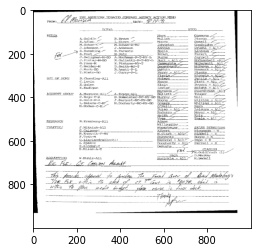

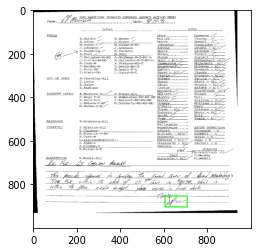

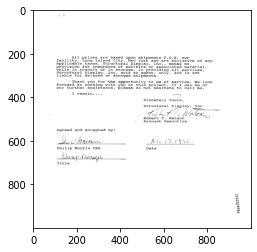

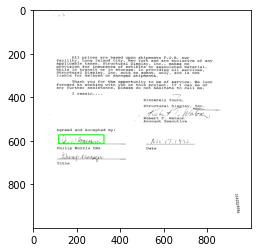

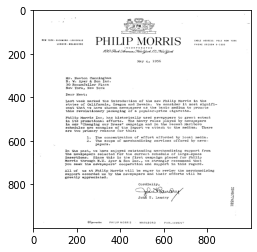

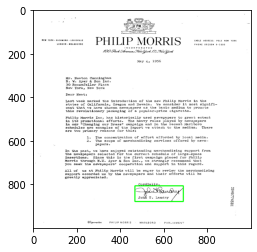

In [10]:
IMAGE_SHAPE = 0
for i in range(3): #data.values
    random = np.random.randint(0, data.shape[0]) 
    random_row = data.iloc[random]
    
    image = plt.imread(train_dir + random_row[0]) 
    plt.figure()
    plt.imshow(image)
    IMAGE_SHAPE = image.shape
    print('Image shape:',image.shape)
    print('Name,xmin,ymin,xmax,ymax:',random_row)
    point1=(int(random_row[1]),int(random_row[2]))
    point2=(int(random_row[3]),int(random_row[4]))
    cv2.rectangle(image,point1,point2, color = (0, 255, 0), thickness = 3)
    plt.figure()
    plt.imshow(image)

In [11]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5
!pip install -r ./yolov5/requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 14887, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 14887 (delta 0), reused 0 (delta 0), pack-reused 14882
Receiving objects: 100% (14887/14887), 13.86 MiB | 28.79 MiB/s, done.
Resolving deltas: 100% (10246/10246), done.


In [12]:
img_h, img_w, num_channels = (IMAGE_SHAPE[0], IMAGE_SHAPE[1], IMAGE_SHAPE[2])
data['x_center'] = (data['xmin'] + data['xmax'])/2
data['y_center'] = (data['ymin'] + data['ymax'])/2
data['w'] = data['xmax'] - data['xmin']
data['h'] = data['ymax'] - data['ymin']
data['classes'] = 0
data['x_center'] = data['x_center']/img_w
data['w'] = data['w']/img_w
data['y_center'] = data['y_center']/img_h
data['h'] = data['h']/img_h
data.head()

FileName  xmin  ymin  xmax  ymax  x_center  y_center      w      h  classes
0    1.tif   509   847   938   903    0.7235    0.8750  0.429  0.056        0
1    2.tif   167   583   254   622    0.2105    0.6025  0.087  0.039        0
2    3.tif   160   642   396   678    0.2780    0.6600  0.236  0.036        0
3    4.tif   519   664   680   712    0.5995    0.6880  0.161  0.048        0
4    5.tif   667   566   815   615    0.7410    0.5905  0.148  0.049        0

In [73]:
img_h, img_w, num_channels = (IMAGE_SHAPE[0], IMAGE_SHAPE[1], IMAGE_SHAPE[2])
test['x_center'] = (test['xmin'] + test['xmax'])/2
test['y_center'] = (test['ymin'] + test['ymax'])/2
test['w'] = test['xmax'] - test['xmin']
test['h'] = test['ymax'] - test['ymin']
test['classes'] = 0
test['x_center'] = test['x_center']/img_w
test['w'] = test['w']/img_w
test['y_center'] = test['y_center']/img_h
test['h'] = test['h']/img_h
test.head()

FileName  xmin  ymin  xmax  ymax  x_center  y_center      w      h  classes
0  680.tif   493   692   698   742    0.5955    0.7170  0.205  0.050        0
1  681.tif   138   684   275   714    0.2065    0.6990  0.137  0.030        0
2  682.tif   534   465   738   506    0.6360    0.4855  0.204  0.041        0
3  682.tif   151   558   434   626    0.2925    0.5920  0.283  0.068        0
4  683.tif   622   553   771   599    0.6965    0.5760  0.149  0.046        0

In [71]:
index = list(set(data.FileName))
index_test = list(set(test.FileName))

In [14]:
if not os.path.exists("data"):
    os.makedirs('data')
    os.makedirs('data/fold{}'.format(0))

In [74]:
if not os.path.exists("test"):
    os.makedirs('test')
    os.makedirs('test/fold{}'.format(0))

In [75]:
source = 'TrainImages'
if True:
    for fold in [0]:
        val_index = index[len(index)*fold//5:len(index)*(fold+1)//5]
        for name,mini in tqdm(data.groupby('FileName')):
            if name in val_index:
                path2save = 'val/'
            else:
                path2save = 'train/'
            if not os.path.exists('data/fold{}/labels/'.format(fold)+path2save):
                os.makedirs('data/fold{}/labels/'.format(fold)+path2save)
            with open('data/fold{}/labels/'.format(fold)+path2save+name+".txt", 'w+') as f:
                row = mini[['classes','x_center','y_center','w','h']].astype(float).values
                row = row.astype(str)
                for j in range(len(row)):
                    text = ' '.join(row[j])
                    f.write(text)
                    f.write("\n")
            if not os.path.exists('data/fold{}/images/{}'.format(fold,path2save)):
                os.makedirs('data/fold{}/images/{}'.format(fold,path2save))
            sh.copy("/kaggle/input/signature-detection-train-images/{}/{}".format(source,name),'data/fold{}/images/{}/{}.jpg'.format(fold,path2save,name))

  0%|          | 0/660 [00:00<?, ?it/s]

In [133]:
source_test = 'TestImages'
if True:
    for fold in [0]:
        val_index = len(index_test)
        for name,mini in tqdm(test.groupby('FileName')):
            path2save = 'test/'
            if not os.path.exists('data/fold{}/labels/'.format(fold)+path2save):
                os.makedirs('data/fold{}/labels/'.format(fold)+path2save)
            with open('data/fold{}/labels/'.format(fold)+path2save+name+".txt", 'w+') as f:
                row = mini[['classes','x_center','y_center','w','h']].astype(float).values
                row = row.astype(str)
                for j in range(len(row)):
                    text = ' '.join(row[j])
                    f.write(text)
                    f.write("\n")
            if not os.path.exists('data/fold{}/images/{}'.format(fold,path2save)):
                os.makedirs('data/fold{}/images/{}'.format(fold,path2save))
            sh.copy("/kaggle/input/signature-detection-test-data/{}/{}".format(source_test,name),'data/fold{}/images/{}/{}.jpg'.format(fold,path2save,name))

  0%|          | 0/115 [00:00<?, ?it/s]

In [134]:
%%writefile dataset.yaml
path: /kaggle/working/data/fold0/
train: images/train
val: images/val
test: images/test

names: 
  0: Signature

Overwriting dataset.yaml


**FOR YOLOv5s**

In [91]:
IMG_SIZE = IMAGE_SHAPE[1]
CONF_TRESHOLD = 0.5
IOU_THRESHOLD = 0.5

In [ ]:
MODEL = 'yolov5s.pt' # 'yolov5x.pt'

In [23]:
import time

# start timer
start_time = time.perf_counter()

# training for yolov5s model
!python yolov5/train.py --batch 6 --epochs 30 --data dataset.yaml --weights {MODEL} --name my_yolov5_model_s

# stop timer
end_time = time.perf_counter()

# calculate elapsed time
elapsed_time = end_time - start_time

print(f'Training time for {MODEL} model: {elapsed_time:0.2f} seconds')

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=6, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=my_yolov5_model_s, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-49-g3c1afd9 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, mome

In [33]:
!ls yolov5/runs/train/my_yolov5_model_s2

F1_curve.png					    results.png
PR_curve.png					    train_batch0.jpg
P_curve.png					    train_batch1.jpg
R_curve.png					    train_batch2.jpg
confusion_matrix.png				    val_batch0_labels.jpg
events.out.tfevents.1672088775.b6abe1228880.1163.0  val_batch0_pred.jpg
hyp.yaml					    val_batch1_labels.jpg
labels.jpg					    val_batch1_pred.jpg
labels_correlogram.jpg				    val_batch2_labels.jpg
opt.yaml					    val_batch2_pred.jpg
results.csv					    weights


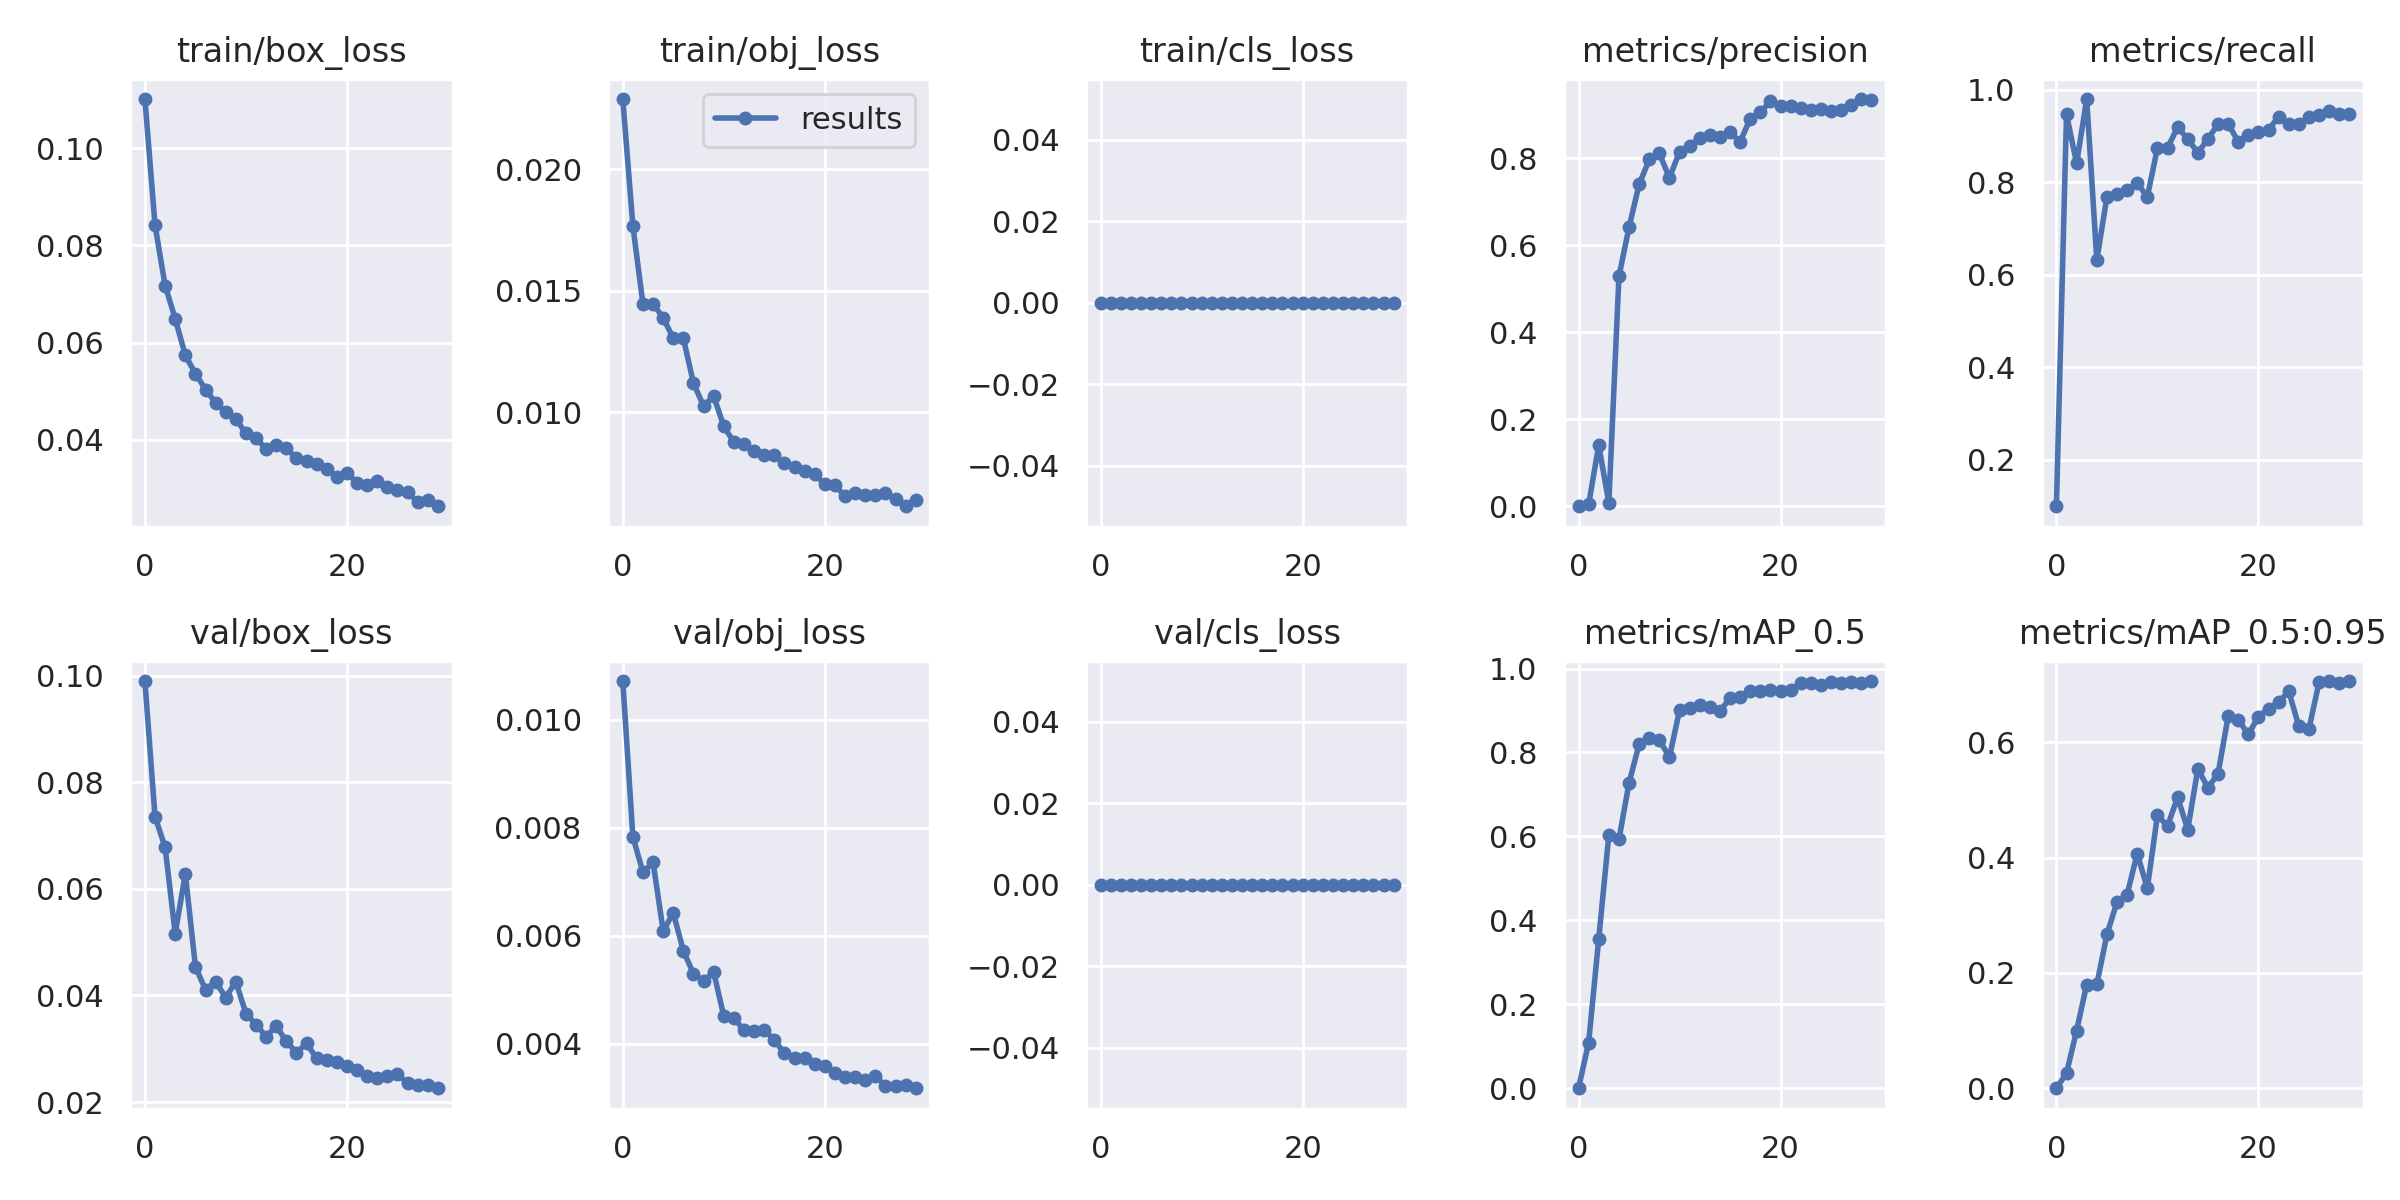

In [35]:
Image.open("/kaggle/working/yolov5/runs/train/my_yolov5_model_s2/results.png")

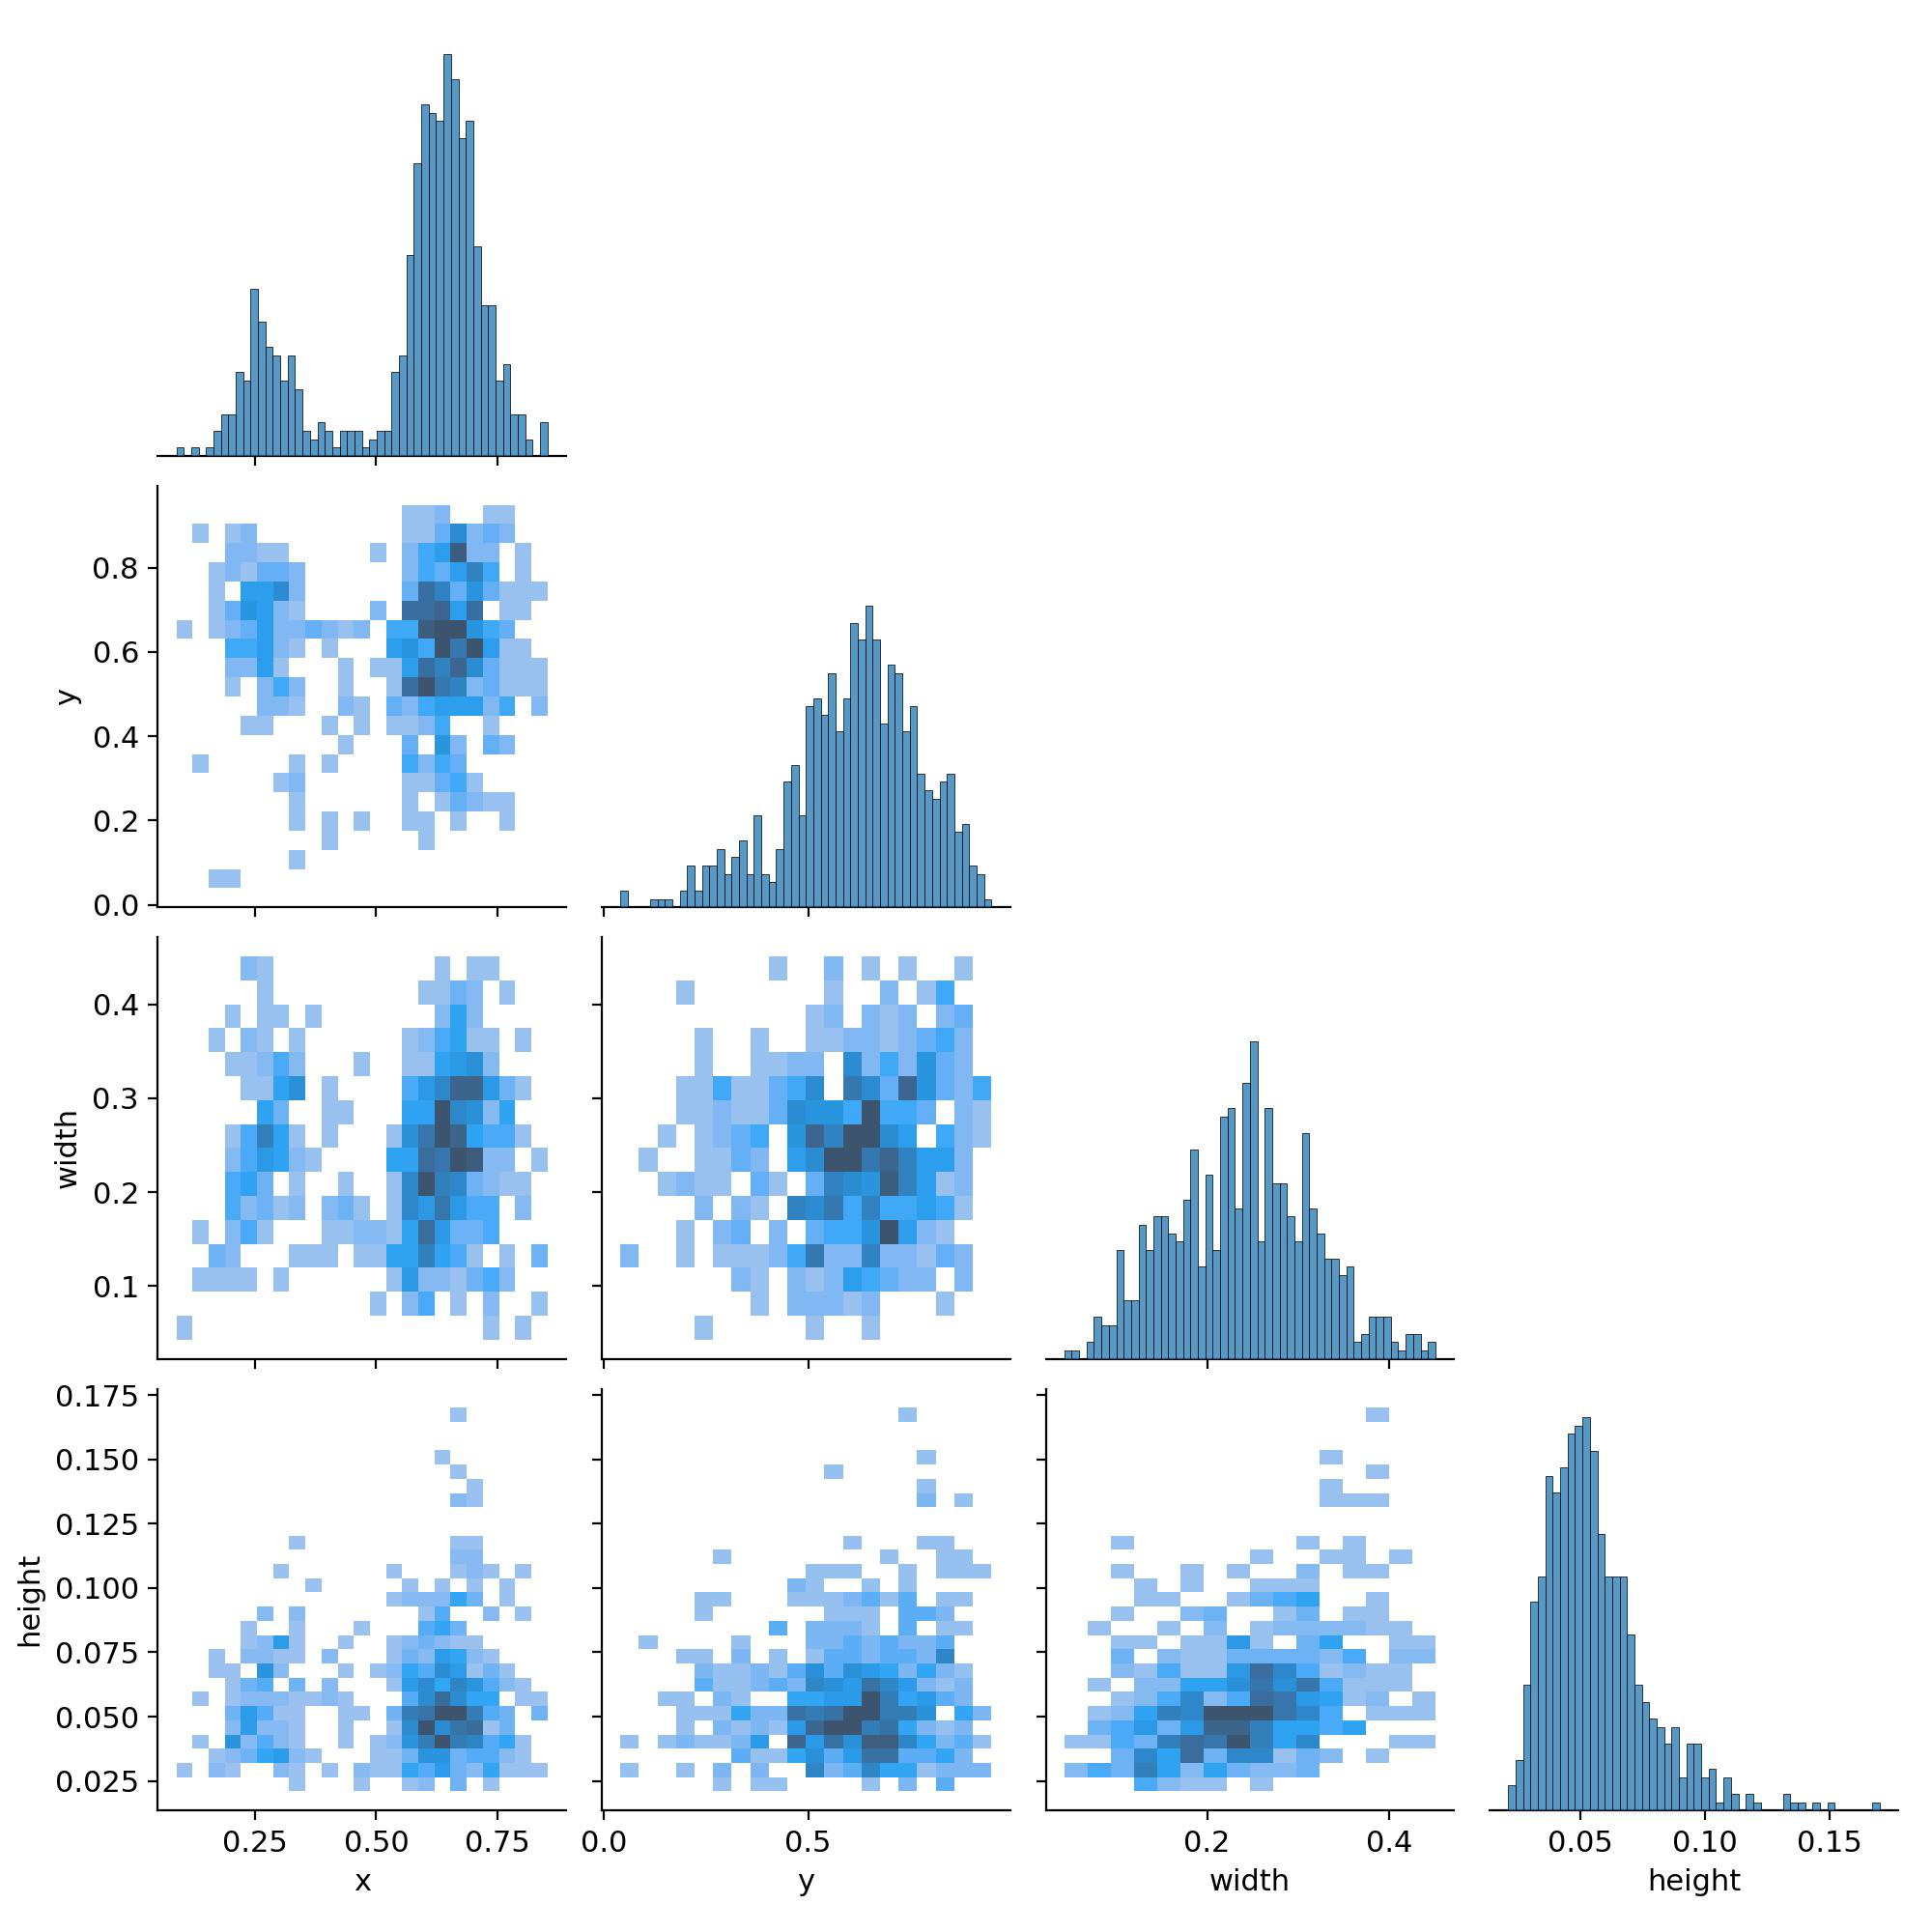

In [38]:
Image.open("/kaggle/working/yolov5/runs/train/my_yolov5_model_s2/labels_correlogram.jpg")

In [135]:
!python ./yolov5/detect.py --img {IMG_SIZE} --conf {CONF_TRESHOLD} --source {test_dir} --weights yolov5/runs/train/my_yolov5_model_s2/weights/best.pt

detect: weights=['yolov5/runs/train/my_yolov5_model_s2/weights/best.pt'], source=/kaggle/input/signature-detection-test-data/TestImages/, data=yolov5/data/coco128.yaml, imgsz=[1000, 1000], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-49-g3c1afd9 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ --img-size [1000, 1000] must be multiple of max stride 32, updating to [1024, 1024]
image 1/115 /kaggle/input/signature-detection-test-data/TestImages/680.tif: 1024x1024 1 Signature, 36.7ms
image 2/115 /kaggle/input/signature-detection-test-data/TestImages/681.tif: 102

In [136]:
pred_dir = './yolov5/runs/detect/exp7'
file_paths = []
flist = os.listdir(pred_dir)
for file in flist:
    fpath = os.path.join(pred_dir, file)
    file_paths.append(fpath)

In [145]:
len(file_paths)

115

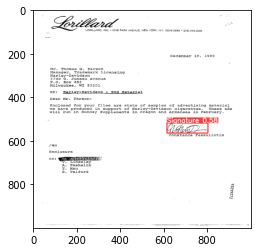

In [137]:
random = np.random.randint(0, len(file_paths) - 1)
img_path = file_paths[random]
img = plt.imread(img_path)
plt.imshow(img)

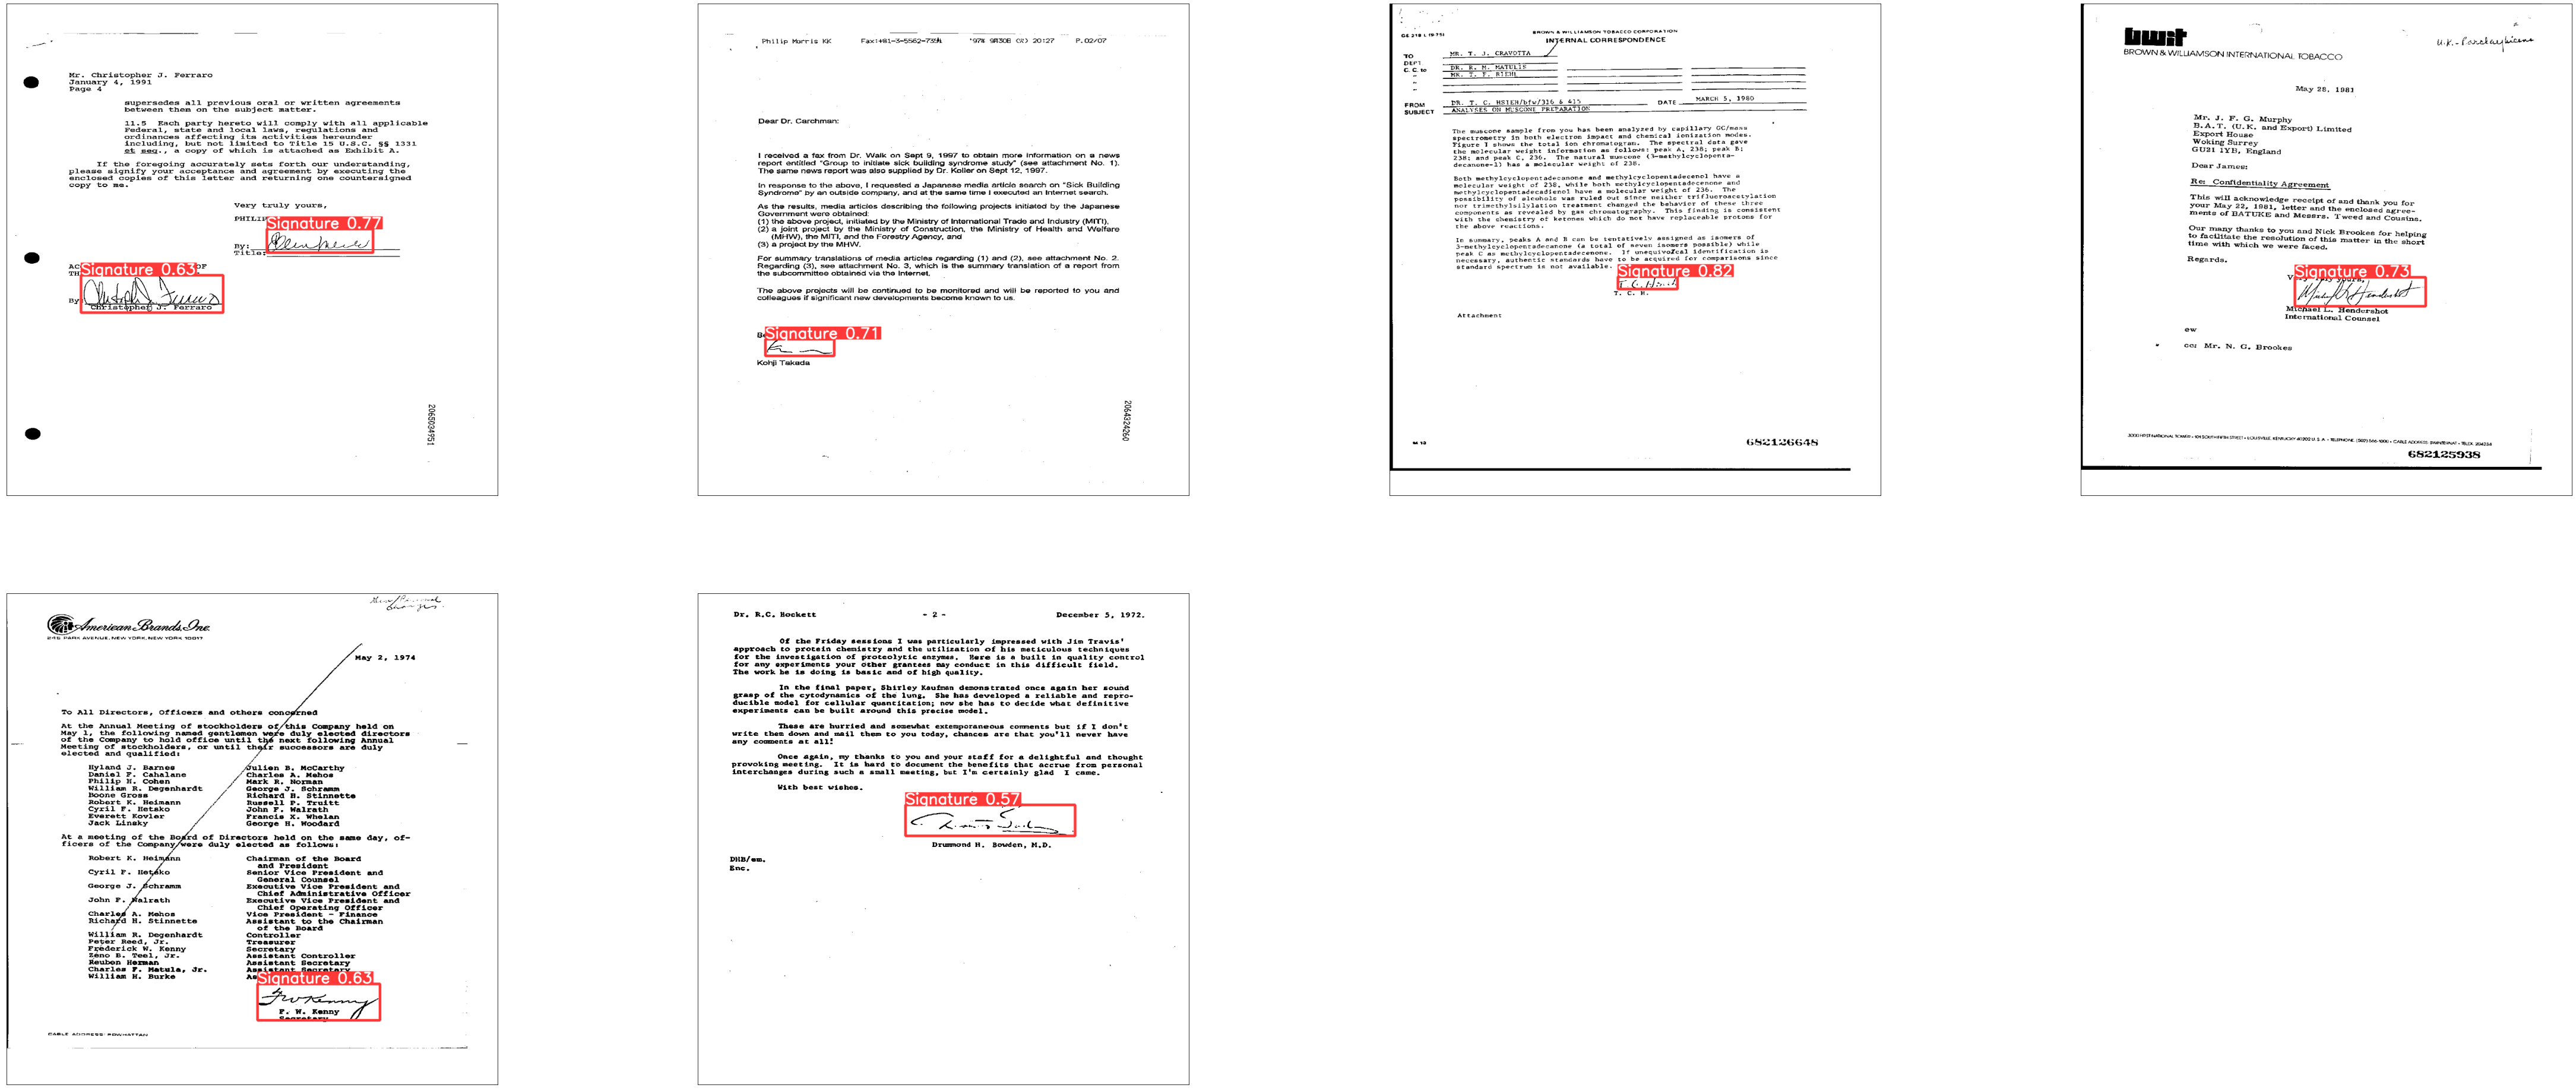

In [138]:
plt.figure(figsize=(80, 70))
for i in range(6):
    random = np.random.randint(0, len(file_paths) - 1)
    plt.subplot(4, 4, i + 1)
    img_path = file_paths[random]
    img = plt.imread(img_path)
    plt.imshow(img)
    #plt.title('Predictions', size=10, color="black") 
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [139]:
!python yolov5/val.py --data dataset.yaml --batch-size 7 --img {IMG_SIZE} --conf {CONF_TRESHOLD}  --weights yolov5/runs/train/my_yolov5_model_s2/weights/best.pt

val: data=dataset.yaml, weights=['yolov5/runs/train/my_yolov5_model_s2/weights/best.pt'], batch_size=7, imgsz=1000, conf_thres=0.5, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.5 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-49-g3c1afd9 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ --img-size 1000 must be multiple of max stride 32, updating to 1024
val: Scanning /kaggle/working/data/fold0/labels/val.cache... 132 images, 0 backg
                 Class     Images  Instances          P          R      mAP50   
                   all        132        151      0.887      0.781      0.833      0.626
Speed: 1.4ms pre-process, 26.3ms inference, 1.6ms

In [140]:
!ls yolov5/runs/val/exp7

F1_curve.png  confusion_matrix.png   val_batch1_pred.jpg
PR_curve.png  val_batch0_labels.jpg  val_batch2_labels.jpg
P_curve.png   val_batch0_pred.jpg    val_batch2_pred.jpg
R_curve.png   val_batch1_labels.jpg


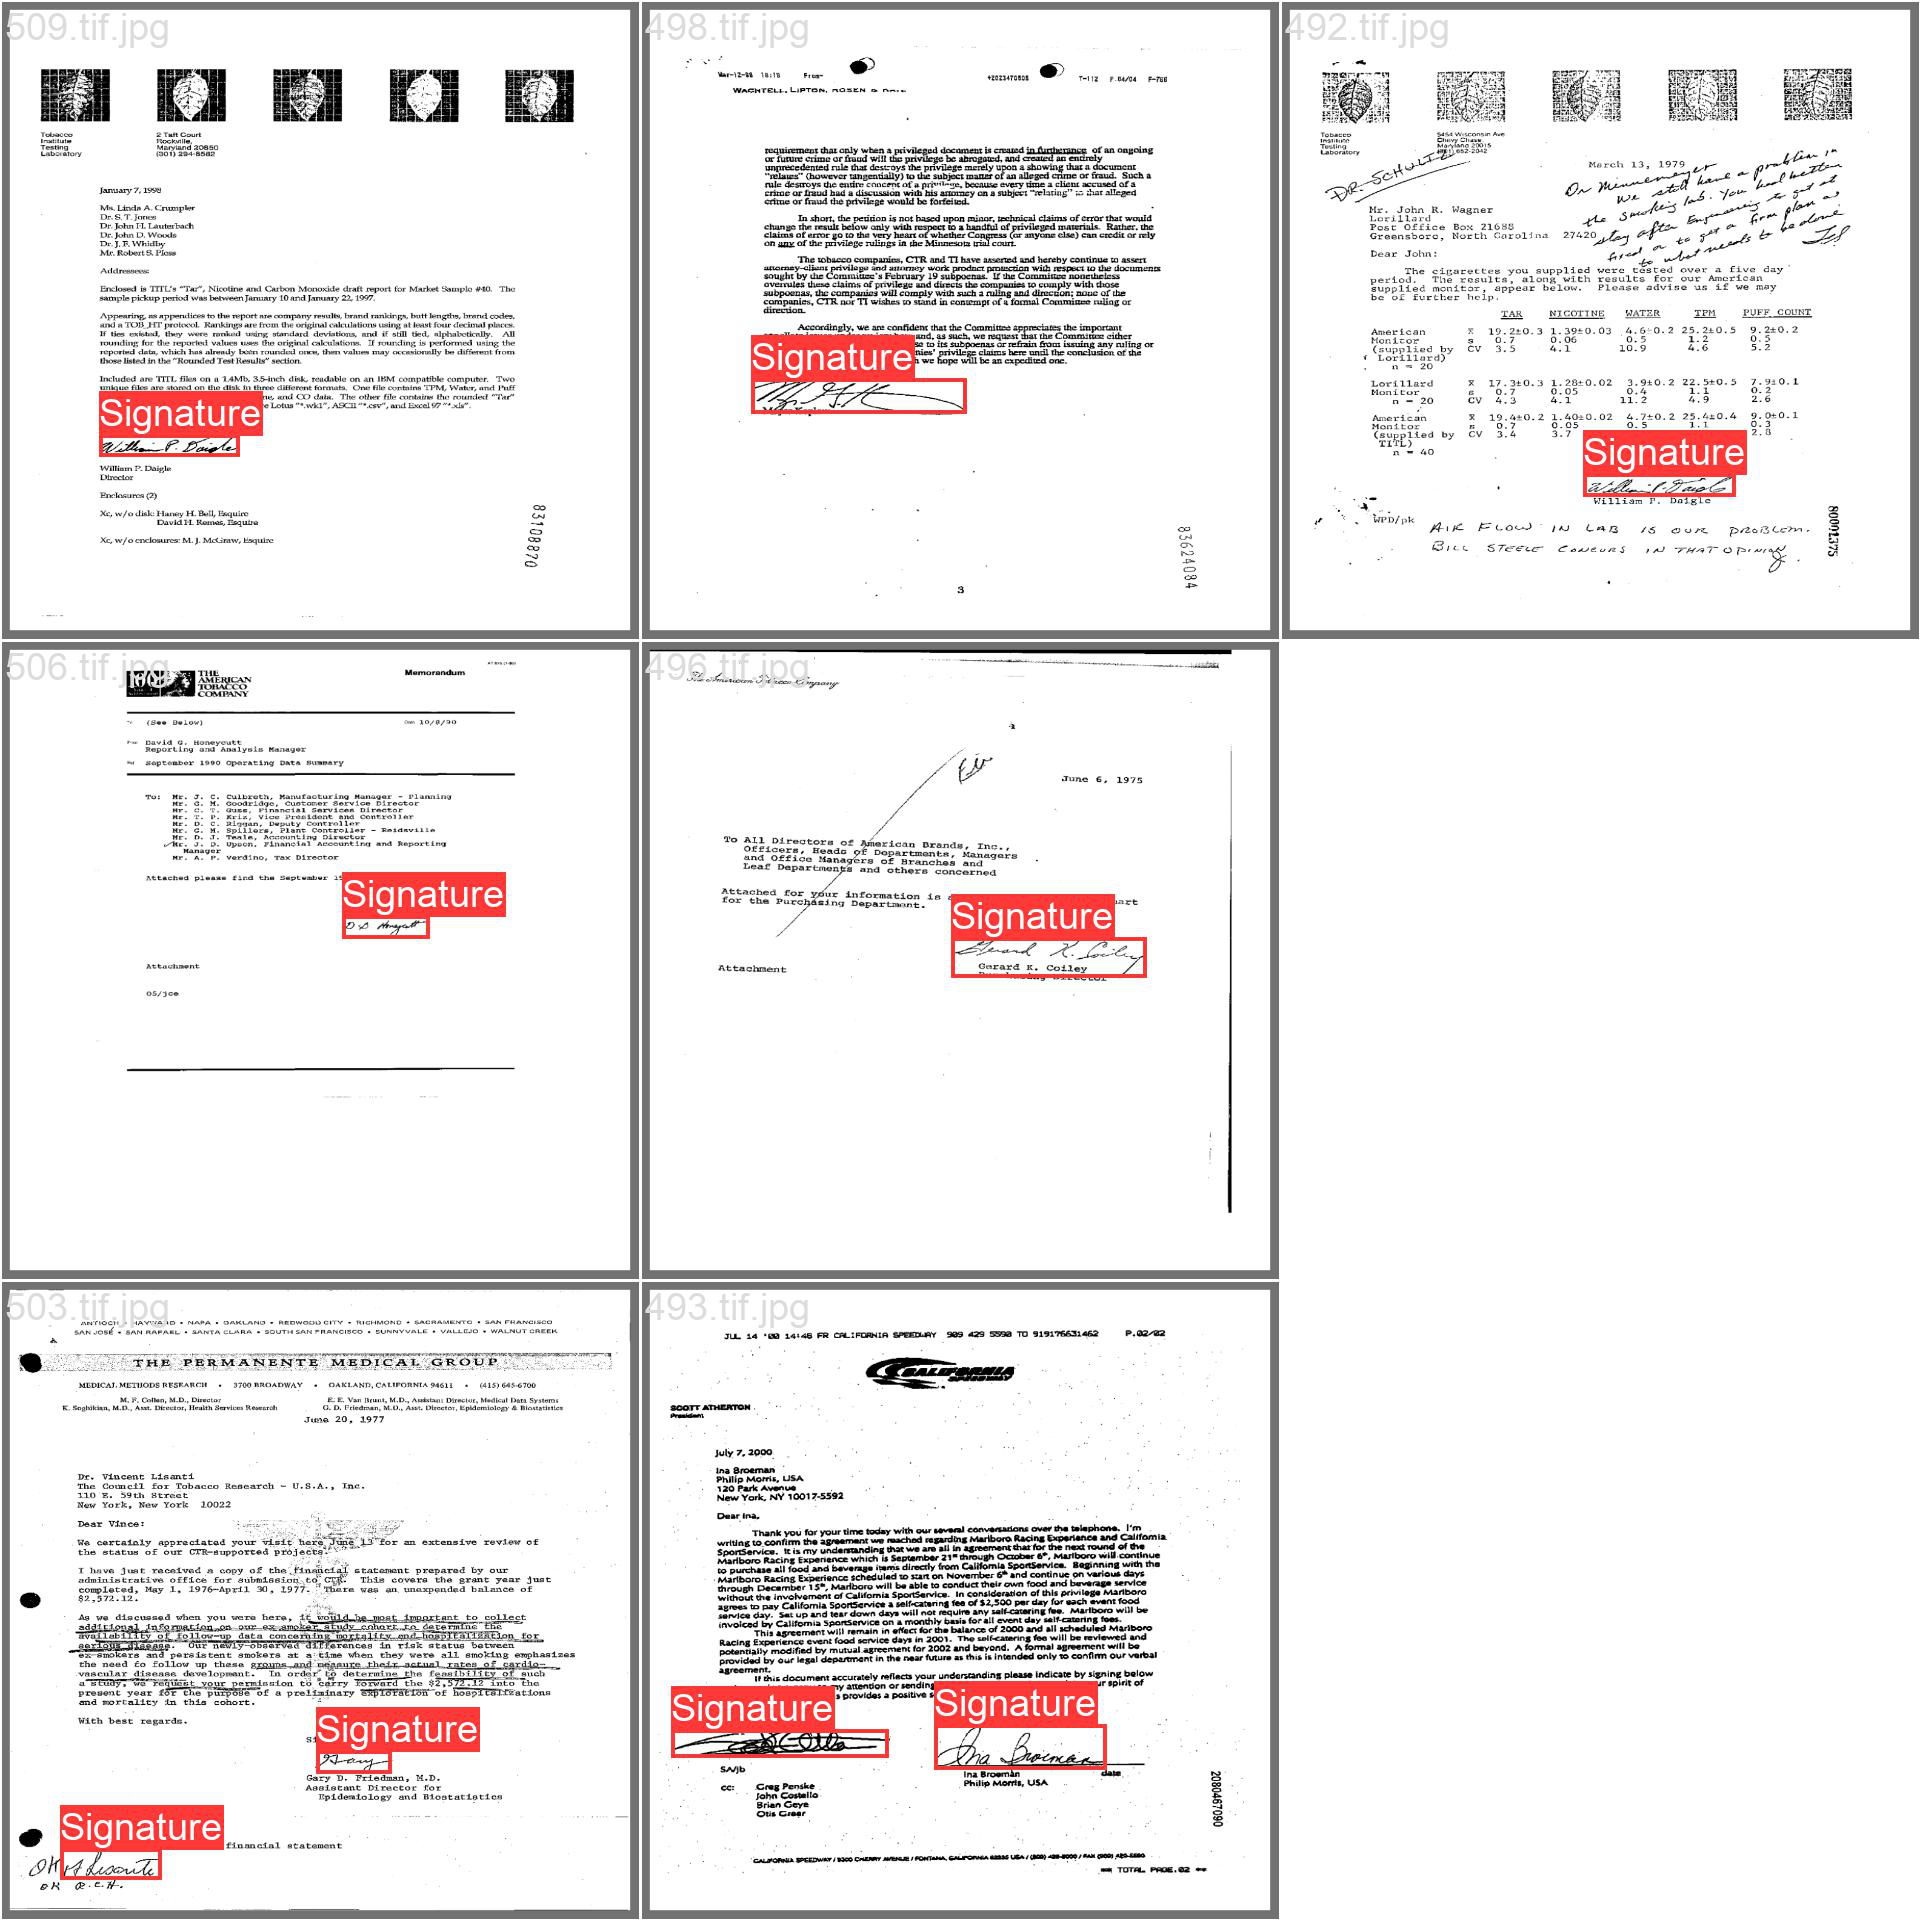

In [141]:
Image.open("yolov5/runs/val/exp7/val_batch1_labels.jpg")

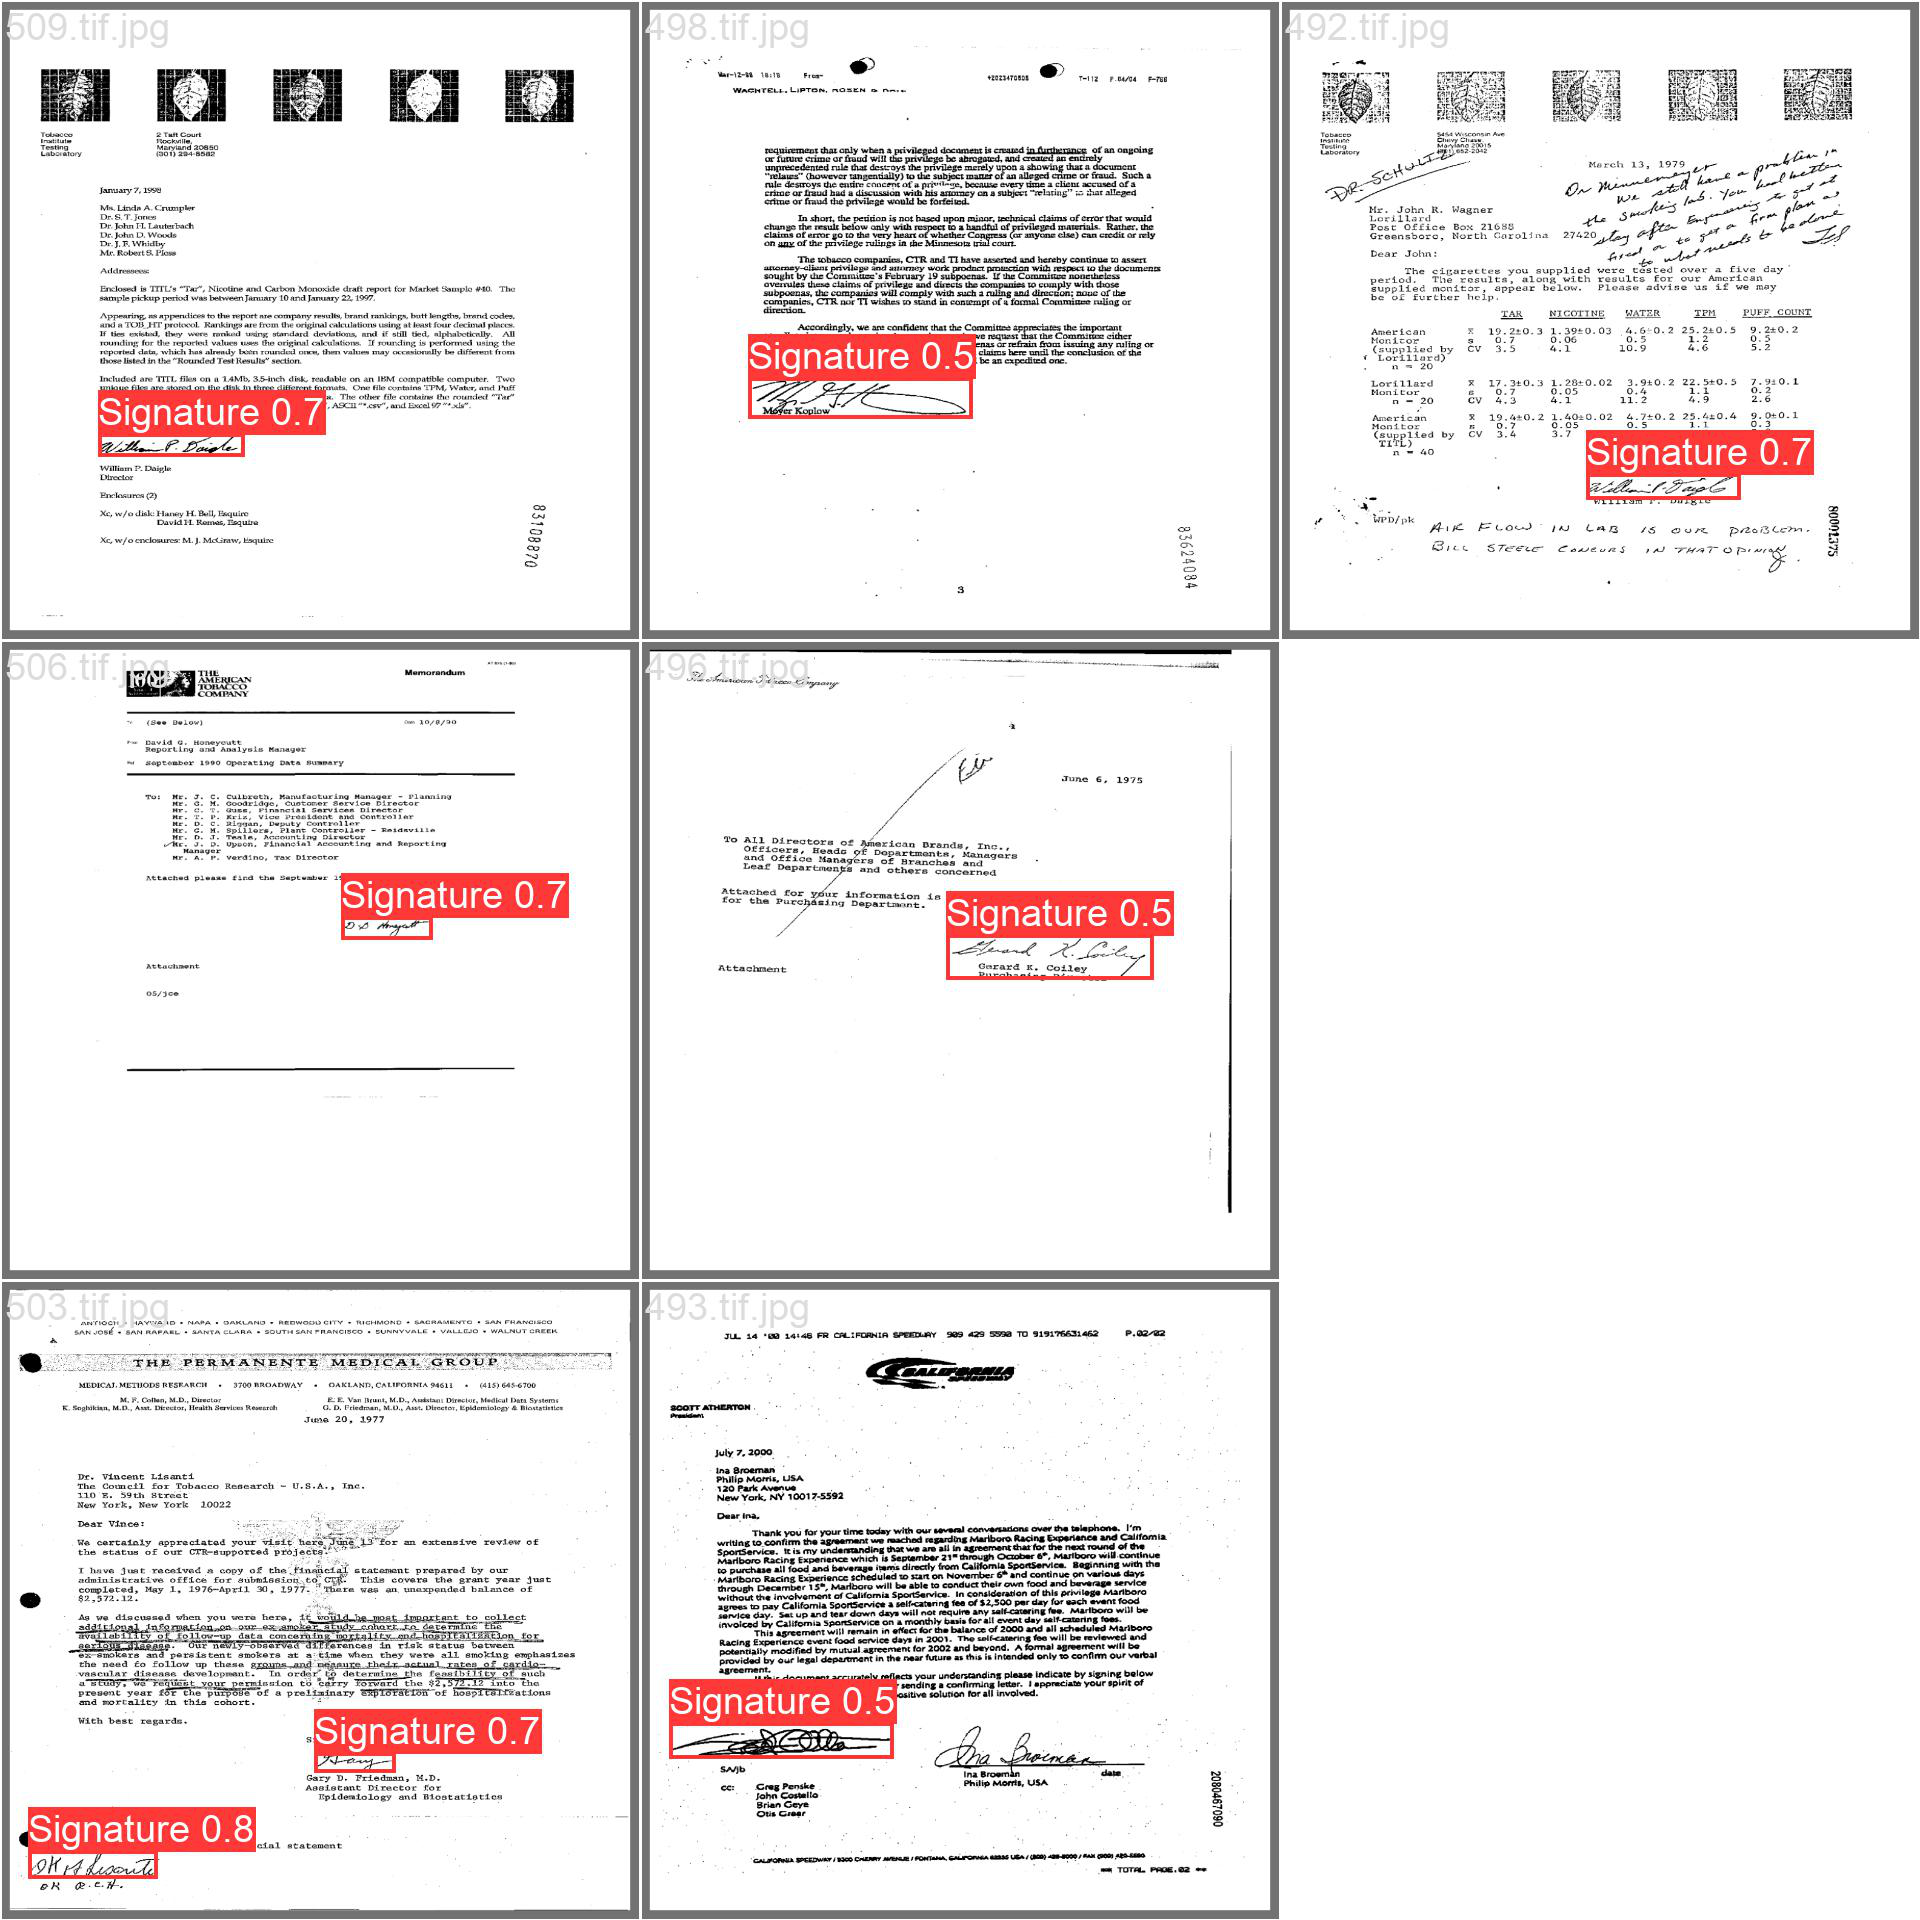

In [142]:
Image.open("yolov5/runs/val/exp7/val_batch1_pred.jpg")

In [ ]:
#!python ./yolov5/detect.py --img {IMG_SIZE} --conf {CONF_TRESHOLD} --iou-thres {IOU_THRESHOLD} --source {train_dir} --weights {MODEL}

In [ ]:
#!python yolov5/val.py --weight {MODEL}

In [105]:
import torch